In [239]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.finance as finance
import datetime
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

In [240]:
# Define data path 
#ddir = 'C:/Users/mphan21/Google Drive/Academics/Spring 2018/BehavioralFinance/hmwk2/'
#ddir = 'C:/Users/mphan/Documents/Behavioral-Finance/hmwk2/'
ddir = ''

# Monthly equal weight
me_mon_ew = pd.read_csv(ddir+'me_mon_ew.csv')
me_mon_ew['date']=pd.to_datetime(me_mon_ew['date'], \
                                 format="%Y%m").dt.strftime('%Y%m')
me_mon_ew.iloc[:,1:me_mon_ew.shape[1]]=me_mon_ew.iloc[:,1:me_mon_ew.shape[1]]/10

# Monthly value weight
me_mon_vw = pd.read_csv(ddir+'me_mon_vw.csv')
me_mon_vw['date']=pd.to_datetime(me_mon_vw['date'], \
                                 format="%Y%m").dt.strftime('%Y%m')
me_mon_vw.iloc[:,1:me_mon_vw.shape[1]]=me_mon_vw.iloc[:,1:me_mon_vw.shape[1]]/10

# Jan 1963 - Dec 2017
aqr_ff_data = pd.read_csv(ddir + 'aqr_ff_data.csv')
aqr_ff_data['date'] = pd.to_datetime(aqr_ff_data['date'], \
                                     format="%Y%m").dt.strftime('%Y%m')

# Fama French Monthly
fama_french = pd.read_csv(ddir+'fama_french.csv')
fama_french.columns = ['date', 'mktrf', 'smb', 'hml', 'rf', 'umd']
fama_french['date'] = pd.to_datetime(fama_french['date'], \
                                     format='%Y%m%d').dt.strftime('%Y%m')

# Problem 1

## a) average monthly returns and z-statistics for each portfolio.

In [241]:
me_mon_ew.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,192607,-0.145,0.029,-0.015,0.133,0.124,0.198,0.155,0.138,0.338,0.329
1,192608,0.512,0.259,0.403,0.315,0.272,0.472,0.160,0.163,0.098,0.370
2,192609,0.093,-0.187,-0.227,-0.053,0.007,-0.007,-0.164,0.064,-0.086,0.067
3,192610,-0.484,-0.177,-0.336,-0.483,-0.298,-0.280,-0.345,-0.327,-0.347,-0.243
4,192611,-0.078,-0.032,-0.029,0.465,0.324,0.357,0.382,0.295,0.361,0.270


Average Returns

In [242]:
avg_mon_ew=me_mon_ew[me_mon_ew.columns[1:me_mon_ew.shape[1]]].mean()
avg_mon_ew

Lo 10    0.180088
2-Dec    0.136317
3-Dec    0.129316
4-Dec    0.122953
5-Dec    0.116696
6-Dec    0.119068
7-Dec    0.110369
8-Dec    0.107329
9-Dec    0.101801
Hi 10    0.089945
dtype: float64

Standard Deviation

In [243]:
std_mon_ew=me_mon_ew[me_mon_ew.columns[1:me_mon_ew.shape[1]]].std()
std_mon_ew

Lo 10    1.066394
2-Dec    0.914241
3-Dec    0.821322
4-Dec    0.773996
5-Dec    0.722719
6-Dec    0.694519
7-Dec    0.660380
8-Dec    0.627549
9-Dec    0.596683
Hi 10    0.540110
dtype: float64

Z Score

In [244]:
z_mon_ew=avg_mon_ew/std_mon_ew
z_mon_ew

Lo 10    0.168876
2-Dec    0.149104
3-Dec    0.157449
4-Dec    0.158854
5-Dec    0.161468
6-Dec    0.171440
7-Dec    0.167129
8-Dec    0.171028
9-Dec    0.170611
Hi 10    0.166532
dtype: float64

## b) CAPM alphas and t-statistics

In [245]:
mon_ew_combine=pd.merge(me_mon_ew,fama_french,on='date')
mon_ew_combine.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10,mktrf,smb,hml,rf,umd
0,192607,-0.145,0.029,-0.015,0.133,0.124,0.198,0.155,0.138,0.338,0.329,0.0296,-0.0230,-0.0287,0.0022,NaN
1,192608,0.512,0.259,0.403,0.315,0.272,0.472,0.160,0.163,0.098,0.370,0.0264,-0.0140,0.0419,0.0025,NaN
2,192609,0.093,-0.187,-0.227,-0.053,0.007,-0.007,-0.164,0.064,-0.086,0.067,0.0036,-0.0132,0.0001,0.0023,NaN
3,192610,-0.484,-0.177,-0.336,-0.483,-0.298,-0.280,-0.345,-0.327,-0.347,-0.243,-0.0324,0.0004,0.0051,0.0032,NaN
4,192611,-0.078,-0.032,-0.029,0.465,0.324,0.357,0.382,0.295,0.361,0.270,0.0253,-0.0020,-0.0035,0.0031,NaN


In [246]:
alphas = [0] * 10
tstats = [0] * 10
mon_ew_resid = me_mon_ew
for portfolio in range(1,11):
    print("Portfolio: "+mon_ew_combine.columns[portfolio])
    cur_mod=sm.OLS(mon_ew_combine[mon_ew_combine.columns[portfolio]]-mon_ew_combine['rf'], 
                   sm.add_constant(mon_ew_combine['mktrf']), missing='drop').fit()
    alphas[portfolio-1] = cur_mod.params[0]
    tstats[portfolio-1] = cur_mod.tvalues[0]
    mon_ew_resid[mon_ew_combine.columns[portfolio]]=cur_mod.resid
    print(cur_mod.summary())
    print(portfolio)

Portfolio: Lo 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1148.
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          9.33e-173
Time:                        22:26:03   Log-Likelihood:                -1234.8
No. Observations:                1098   AIC:                             2474.
Df Residuals:                    1096   BIC:                             2484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0826      0.023   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.691e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:04   Log-Likelihood:                 490.70
No. Observations:                1098   AIC:                            -977.4
Df Residuals:                    1096   BIC:                            -967.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.005      6.170      0.0

CAPM alphas and their t-stats

In [247]:
reg_out_ew = pd.DataFrame(alphas).transpose().append(pd.DataFrame(tstats).transpose(), ignore_index=True)
reg_out_ew.index = ['alphas', 'tstat']
reg_out_ew.columns = me_mon_ew.columns[1:me_mon_ew.shape[1]]
reg_out_ew

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
alphas,0.082626,0.038446,0.036191,0.033829,0.030595,0.034682,0.029262,0.029067,0.026805,0.021251
tstat,3.643518,2.531968,3.125320,3.275718,3.755011,5.091765,4.942877,6.170298,6.665939,7.118812


**GRS Test**

$$ F_{N, T-N-K} \sim \frac{T-N-K}{N}\frac{\hat{\alpha}'\hat{\Sigma}^{-1}\hat{\alpha}}{1+\hat{\mu}'\hat{\Omega}^{-1}\hat{\mu}}$$

In [248]:
sigma_resid=mon_ew_resid.iloc[:,1:mon_ew_resid.shape[1]].cov()
sigma_resid

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Lo 10,0.555582,0.326793,0.227802,0.190871,0.133383,0.099689,0.082940,0.036931,0.017338,-0.014050
2-Dec,0.326793,0.249085,0.174076,0.150726,0.108760,0.082173,0.066739,0.033915,0.014537,-0.009497
3-Dec,0.227802,0.174076,0.144868,0.118576,0.088386,0.068470,0.054340,0.031933,0.014609,-0.007458
4-Dec,0.190871,0.150726,0.118576,0.115219,0.080624,0.063981,0.051339,0.030721,0.014533,-0.005579
5-Dec,0.133383,0.108760,0.088386,0.080624,0.071721,0.051384,0.041950,0.027465,0.014373,-0.003227
6-Dec,0.099689,0.082173,0.068470,0.063981,0.051384,0.050121,0.034838,0.024598,0.014686,-0.001463
7-Dec,0.082940,0.066739,0.054340,0.051339,0.041950,0.034838,0.037862,0.021780,0.013188,0.000148
8-Dec,0.036931,0.033915,0.031933,0.030721,0.027465,0.024598,0.021780,0.023974,0.012835,0.001789
9-Dec,0.017338,0.014537,0.014609,0.014533,0.014373,0.014686,0.013188,0.012835,0.017469,0.004161
Hi 10,-0.014050,-0.009497,-0.007458,-0.005579,-0.003227,-0.001463,0.000148,0.001789,0.004161,0.009627


In [249]:
#alpha*sigma^-1*alpha
resid_quad = np.dot(alphas,pd.DataFrame(np.linalg.inv(sigma_resid.values), 
                           sigma_resid.columns, sigma_resid.index).dot(alphas))
resid_quad

0.09566032106477257

In [250]:
#(1+E(F)Cov(F)^-1E(F))
mu_factors = mon_ew_combine['mktrf'].mean()
sigma_factors = mon_ew_combine['mktrf'].var()
factors_quad=(1+mu_factors*1/sigma_factors*mu_factors)
factors_quad

1.0154114057149386

In [251]:
N=10
T=mon_ew_combine.shape[0] # (1098)
K=1

F_stat = T/(T-2)*(T-N-K)/N*resid_quad/factors_quad
F_stat

10.259144026703506

In [252]:
pvalue=1-f.cdf(F_stat, N, T-N-K)
pvalue

1.1102230246251565e-16

**Since the p< 0.01, we reject the hypothesis that the sized ranked deciles are priced by the market portfolio at the 1% significance level**

# Problem 2 - Value Weighted 

In [253]:
mon_vw_combine=pd.merge(me_mon_vw,fama_french,on='date')
mon_vw_combine.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10,mktrf,smb,hml,rf,umd
0,192607,-0.012,0.052,-0.005,0.131,0.121,0.204,0.158,0.129,0.353,0.371,0.0296,-0.0230,-0.0287,0.0022,NaN
1,192608,0.133,0.255,0.400,0.320,0.281,0.445,0.161,0.149,0.061,0.379,0.0264,-0.0140,0.0419,0.0025,NaN
2,192609,0.059,-0.200,-0.201,-0.046,-0.006,0.014,-0.202,0.074,-0.077,0.125,0.0036,-0.0132,0.0001,0.0023,NaN
3,192610,-0.433,-0.201,-0.325,-0.435,-0.293,-0.248,-0.360,-0.326,-0.336,-0.256,-0.0324,0.0004,0.0051,0.0032,NaN
4,192611,-0.330,-0.023,0.008,0.474,0.364,0.344,0.363,0.305,0.386,0.240,0.0253,-0.0020,-0.0035,0.0031,NaN


In [254]:
alphas_vw = [0] * 10
tstats_vw = [0] * 10
mon_vw_resid = me_mon_vw
for portfolio in range(1,11):
    print("Portfolio: "+mon_vw_combine.columns[portfolio])
    cur_mod=sm.OLS(mon_vw_combine[mon_vw_combine.columns[portfolio]]-mon_vw_combine['rf'], 
                   sm.add_constant(mon_vw_combine['mktrf']), missing='drop').fit()
    alphas_vw[portfolio-1] = cur_mod.params[0]
    tstats_vw[portfolio-1] = cur_mod.tvalues[0]
    mon_vw_resid[mon_vw_combine.columns[portfolio]]=cur_mod.resid
    print(cur_mod.summary())
    print(portfolio)

Portfolio: Lo 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1526.
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          7.96e-210
Time:                        22:26:04   Log-Likelihood:                -1069.9
No. Observations:                1098   AIC:                             2144.
Df Residuals:                    1096   BIC:                             2154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0432      0.020   

8
Portfolio: 9-Dec
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 2.756e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:05   Log-Likelihood:                 836.67
No. Observations:                1098   AIC:                            -1669.
Df Residuals:                    1096   BIC:                            -1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0279      0.003 

In [255]:
reg_out_vw = pd.DataFrame(alphas_vw).transpose().append(pd.DataFrame(tstats_vw).transpose(), ignore_index=True)
reg_out_vw.index = ['alphas', 'tstat']
reg_out_vw.columns = me_mon_vw.columns[1:me_mon_vw.shape[1]]
reg_out_vw

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
alphas,0.043212,0.031944,0.034774,0.035488,0.032321,0.035906,0.031788,0.031393,0.027948,0.024527
tstat,2.214365,2.284532,3.199725,3.690703,4.193416,5.511876,5.721362,7.024332,8.130324,9.351996


**GRS Test**

$$ F_{N, T-N-K} \sim \frac{T-N-K}{N}\frac{\hat{\alpha}'\hat{\Sigma}^{-1}\hat{\alpha}}{1+\hat{\mu}'\hat{\Omega}^{-1}\hat{\mu}}$$

In [256]:
sigma_resid_vw=mon_vw_resid.iloc[:,1:mon_vw_resid.shape[1]].cov()
sigma_resid_vw

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Lo 10,0.411400,0.265360,0.193061,0.159189,0.115651,0.087675,0.069109,0.035973,0.017414,-0.030193
2-Dec,0.265360,0.211224,0.148704,0.125569,0.095023,0.071254,0.055192,0.031034,0.013024,-0.024972
3-Dec,0.193061,0.148704,0.127596,0.102230,0.077829,0.060646,0.045316,0.029328,0.012572,-0.021202
4-Dec,0.159189,0.125569,0.102230,0.099888,0.070288,0.056794,0.043292,0.027591,0.012540,-0.019581
5-Dec,0.115651,0.095023,0.077829,0.070288,0.064180,0.045254,0.034669,0.023273,0.010735,-0.015936
6-Dec,0.087675,0.071254,0.060646,0.056794,0.045254,0.045846,0.029520,0.021296,0.011136,-0.013482
7-Dec,0.069109,0.055192,0.045316,0.043292,0.034669,0.029520,0.033349,0.018324,0.009720,-0.010964
8-Dec,0.035973,0.031034,0.029328,0.027591,0.023273,0.021296,0.018324,0.021579,0.009083,-0.008354
9-Dec,0.017414,0.013024,0.012572,0.012540,0.010735,0.011136,0.009720,0.009083,0.012766,-0.004374
Hi 10,-0.030193,-0.024972,-0.021202,-0.019581,-0.015936,-0.013482,-0.010964,-0.008354,-0.004374,0.007431


In [257]:
resid_quad_vw = np.dot(alphas_vw,pd.DataFrame(np.linalg.inv(sigma_resid_vw.values), 
                           sigma_resid_vw.columns, sigma_resid_vw.index).dot(alphas_vw))
resid_quad_vw
np.linalg.inv(sigma_resid_vw)

array([[ 13.95051703, -14.92020954,  -6.99161561,  -1.2352964 ,
          4.96967619,   1.63925519,  -2.19959937,   4.48436349,
         -4.07937059,  -3.63292725],
       [-14.92020954,  46.22571741, -18.09485599,  -9.33208041,
        -12.08018313,   2.32206762,  -2.57023705,   6.64494919,
          7.15063277,   4.69418582],
       [ -6.99161561, -18.09485599,  74.18178009, -25.87169059,
        -15.78598786,  -7.56133589,   7.70945218, -10.82673895,
          5.11184223,   8.90312094],
       [ -1.2352964 ,  -9.33208041, -25.87169059,  85.12877218,
        -19.31922765, -24.8711316 , -13.26989108,   1.25107453,
          4.3058224 ,  11.93218562],
       [  4.96967619, -12.08018313, -15.78598786, -19.31922765,
         94.77764007, -22.76851452, -11.79398922,  -6.78593374,
          1.35864247,  21.36947551],
       [  1.63925519,   2.32206762,  -7.56133589, -24.8711316 ,
        -22.76851452, 104.2759014 , -12.51847223, -17.01620479,
        -15.76664772,  20.8317253 ],
       [ -

In [258]:
#(1+E(F)Cov(F)^-1E(F))
mu_factors_vw = mon_vw_combine['mktrf'].mean()
sigma_factors_vw = mon_vw_combine['mktrf'].var()
factors_quad_vw=(1+mu_factors_vw*1/sigma_factors_vw*mu_factors_vw)
factors_quad_vw

1.0154114057149386

In [259]:
N=10
T=mon_vw_combine.shape[0]
K=1

F_stat_vw = T/(T-2)*(T-N+K)/N*resid_quad_vw/factors_quad_vw
F_stat_vw

64.81876576586832

In [260]:
pvalue_vw=1-f.cdf(F_stat_vw, T-N-K, N)
pvalue_vw

2.172639135267218e-08

Because the alphas are much smaller in the CAPM regression using value weighted portfolios, we fail to reject the null that the alphas are jointly different from zero. The CAPM alphas are much larger for the equal weighted portfolios because this weighting approach places more weight on smaller firms, which are more risky and experiences higher returns. Thus we are more likely to reject the GRS test when we are equal weighting.

# Problem 3- Daily Data

## EW

In [261]:
day_ew = pd.read_csv(ddir+'day_ew.csv')
day_ew.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,19260701,1.62,-0.04,0.61,-0.08,-0.41,-0.12,-0.07,-0.06,0.07,0.08
1,19260702,-0.10,-0.54,0.19,0.06,0.31,0.38,0.50,0.42,0.35,0.57
2,19260706,-0.72,0.67,-0.41,0.22,0.68,0.36,0.15,0.33,0.09,0.16
3,19260707,-1.12,-0.05,-0.41,-0.53,0.33,0.21,0.26,0.17,-0.09,0.14
4,19260708,3.50,-0.74,0.00,0.19,-0.03,0.29,0.18,0.23,0.17,0.44


Average Returns

In [262]:
avg_day_ew=day_ew.mean()
avg_day_ew[1:]

Lo 10    0.177938
2-Dec    0.096147
3-Dec    0.077539
4-Dec    0.067608
5-Dec    0.061255
6-Dec    0.060363
7-Dec    0.055997
8-Dec    0.052353
9-Dec    0.049920
Hi 10    0.043885
dtype: float64

Standard Deviation

In [263]:
std_day_ew=day_ew.std()
std_day_ew[1:]

Lo 10    1.289510
2-Dec    1.352653
3-Dec    1.272956
4-Dec    1.235453
5-Dec    1.218495
6-Dec    1.178421
7-Dec    1.174490
8-Dec    1.153034
9-Dec    1.147974
Hi 10    1.109517
dtype: float64

Z Score

In [264]:
z_day_ew=avg_day_ew[1:]/std_day_ew[1:]
z_day_ew

Lo 10    0.137989
2-Dec    0.071080
3-Dec    0.060913
4-Dec    0.054723
5-Dec    0.050271
6-Dec    0.051224
7-Dec    0.047677
8-Dec    0.045404
9-Dec    0.043485
Hi 10    0.039553
dtype: float64

In [265]:
day_fama_french = pd.read_csv(ddir+'F-F_Research_Data_Factors_daily.csv')
day_ew_combine=pd.merge(day_ew,day_fama_french,on='date')
day_ew_combine.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10,Mkt-RF,SMB,HML,RF
0,19260701,1.62,-0.04,0.61,-0.08,-0.41,-0.12,-0.07,-0.06,0.07,0.08,0.10,-0.24,-0.28,0.009
1,19260702,-0.10,-0.54,0.19,0.06,0.31,0.38,0.50,0.42,0.35,0.57,0.45,-0.32,-0.08,0.009
2,19260706,-0.72,0.67,-0.41,0.22,0.68,0.36,0.15,0.33,0.09,0.16,0.17,0.27,-0.35,0.009
3,19260707,-1.12,-0.05,-0.41,-0.53,0.33,0.21,0.26,0.17,-0.09,0.14,0.09,-0.59,0.03,0.009
4,19260708,3.50,-0.74,0.00,0.19,-0.03,0.29,0.18,0.23,0.17,0.44,0.21,-0.36,0.15,0.009


In [266]:
alphas = [0] * 10
tstats = [0] * 10
day_ew_resid = day_ew
for portfolio in range(1,11):
    print("Portfolio: "+day_ew_combine.columns[portfolio])
    cur_mod=sm.OLS(day_ew_combine[day_ew_combine.columns[portfolio]], 
                   sm.add_constant(day_ew_combine['Mkt-RF']), missing='drop').fit()
    alphas[portfolio-1] = cur_mod.params[0]
    tstats[portfolio-1] = cur_mod.tvalues[0]
    day_ew_resid[day_ew_combine.columns[portfolio]]=cur_mod.resid
    print(cur_mod.summary())
    print(portfolio)

Portfolio: Lo 10
                            OLS Regression Results                            
Dep. Variable:                  Lo 10   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.285e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:06   Log-Likelihood:                -35239.
No. Observations:               24140   AIC:                         7.048e+04
Df Residuals:                   24138   BIC:                         7.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.007   

                            OLS Regression Results                            
Dep. Variable:                  6-Dec   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 1.240e+05
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:06   Log-Likelihood:                -16320.
No. Observations:               24140   AIC:                         3.264e+04
Df Residuals:                   24138   BIC:                         3.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.003     10.002      0.0

In [267]:
reg_out_ew = pd.DataFrame(alphas).transpose().append(pd.DataFrame(tstats).transpose(), ignore_index=True)
reg_out_ew.index = ['alphas', 'tstat']
reg_out_ew.columns = day_ew.columns[1:day_ew.shape[1]]
reg_out_ew

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
alphas,0.156983,0.067453,0.048241,0.038336,0.031273,0.030639,0.025840,0.022000,0.019212,0.013826
tstat,23.404948,12.125089,10.690907,9.425167,8.835785,10.002385,9.382124,9.969359,10.734420,10.437849


**GRS Test**

In [268]:
sigma_resid=day_ew_resid.iloc[:,1:day_ew_resid.shape[1]].cov()
sigma_resid

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Lo 10,1.085123,0.542692,0.414650,0.346367,0.275224,0.217411,0.183350,0.109491,0.052402,-0.037226
2-Dec,0.542692,0.746492,0.449431,0.392865,0.321970,0.241714,0.205623,0.128015,0.060062,-0.041694
3-Dec,0.414650,0.449431,0.491129,0.338215,0.285595,0.221193,0.179968,0.117175,0.057527,-0.033976
4-Dec,0.346367,0.392865,0.338215,0.399041,0.263566,0.205768,0.173280,0.114575,0.053193,-0.030488
5-Dec,0.275224,0.321970,0.285595,0.263566,0.302170,0.188836,0.160083,0.110258,0.057248,-0.023412
6-Dec,0.217411,0.241714,0.221193,0.205768,0.188836,0.226330,0.137076,0.098149,0.056065,-0.013766
7-Dec,0.183350,0.205623,0.179968,0.173280,0.160083,0.137076,0.182962,0.092547,0.054627,-0.010177
8-Dec,0.109491,0.128015,0.117175,0.114575,0.110258,0.098149,0.092547,0.117463,0.047784,-0.001226
9-Dec,0.052402,0.060062,0.057527,0.053193,0.057248,0.056065,0.054627,0.047784,0.077261,0.009062
Hi 10,-0.037226,-0.041694,-0.033976,-0.030488,-0.023412,-0.013766,-0.010177,-0.001226,0.009062,0.042320


In [269]:
#alpha*sigma^-1*alpha
resid_quad = np.dot(alphas,pd.DataFrame(np.linalg.inv(sigma_resid.values), 
                           sigma_resid.columns, sigma_resid.index).dot(alphas))
resid_quad

0.032755007301930227

In [270]:
#(1+E(F)Cov(F)^-1E(F))
mu_factors = day_ew_combine['Mkt-RF'].mean()
sigma_factors = day_ew_combine['Mkt-RF'].var()
factors_quad=(1+mu_factors*1/sigma_factors*mu_factors)
factors_quad

1.0007601102601007

In [271]:
N=10
T=day_ew_combine.shape[0] # (1098)
K=1

F_stat = T/(T-2)*(T-N-K)/N*resid_quad/factors_quad
F_stat

78.98107135501643

In [272]:
pvalue=1-f.cdf(F_stat, N, T-N-K)
pvalue

1.1102230246251565e-16

## VW

In [273]:
day_vw = pd.read_csv(ddir+'day_vw.csv')
day_vw.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,19260701,0.58,-0.13,0.68,-0.06,-0.38,-0.07,-0.08,-0.06,0.08,0.18
1,19260702,-0.53,-0.40,0.16,0.10,0.29,0.36,0.51,0.41,0.37,0.52
2,19260706,-0.33,0.61,-0.38,0.23,0.68,0.33,0.15,0.33,0.11,0.16
3,19260707,0.28,-0.10,-0.40,-0.54,0.31,0.17,0.19,0.16,-0.04,0.13
4,19260708,0.55,-0.90,0.04,0.23,-0.06,0.28,0.17,0.20,0.20,0.27


Average Returns

In [274]:
avg_day_vw=day_vw.mean()
avg_day_vw[1:]

Lo 10    0.052299
2-Dec    0.049915
3-Dec    0.050968
4-Dec    0.050392
5-Dec    0.048805
6-Dec    0.049947
7-Dec    0.047227
8-Dec    0.046683
9-Dec    0.044201
Hi 10    0.040198
dtype: float64

Standard Deviation

In [275]:
std_day_vw=day_vw.std()
std_day_vw[1:]

Lo 10    1.285180
2-Dec    1.319543
3-Dec    1.243722
4-Dec    1.207020
5-Dec    1.189668
6-Dec    1.148250
7-Dec    1.147205
8-Dec    1.124077
9-Dec    1.112955
Hi 10    1.072316
dtype: float64

Z Score

In [276]:
z_day_vw=avg_day_vw[1:]/std_day_vw[1:]
z_day_vw

Lo 10    0.040694
2-Dec    0.037828
3-Dec    0.040980
4-Dec    0.041749
5-Dec    0.041024
6-Dec    0.043499
7-Dec    0.041167
8-Dec    0.041530
9-Dec    0.039715
Hi 10    0.037487
dtype: float64

In [277]:
day_vw_combine=pd.merge(day_vw,day_fama_french,on='date')
day_vw_combine.head()

,date,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10,Mkt-RF,SMB,HML,RF
0,19260701,0.58,-0.13,0.68,-0.06,-0.38,-0.07,-0.08,-0.06,0.08,0.18,0.10,-0.24,-0.28,0.009
1,19260702,-0.53,-0.40,0.16,0.10,0.29,0.36,0.51,0.41,0.37,0.52,0.45,-0.32,-0.08,0.009
2,19260706,-0.33,0.61,-0.38,0.23,0.68,0.33,0.15,0.33,0.11,0.16,0.17,0.27,-0.35,0.009
3,19260707,0.28,-0.10,-0.40,-0.54,0.31,0.17,0.19,0.16,-0.04,0.13,0.09,-0.59,0.03,0.009
4,19260708,0.55,-0.90,0.04,0.23,-0.06,0.28,0.17,0.20,0.20,0.27,0.21,-0.36,0.15,0.009


In [278]:
alphas = [0] * 10
tstats = [0] * 10
day_vw_resid = day_vw
for portfolio in range(1,11):
    print("Portfolio: "+day_vw_combine.columns[portfolio])
    cur_mod=sm.OLS(day_vw_combine[day_vw_combine.columns[portfolio]], 
                   sm.add_constant(day_vw_combine['Mkt-RF']), missing='drop').fit()
    alphas[portfolio-1] = cur_mod.params[0]
    tstats[portfolio-1] = cur_mod.tvalues[0]
    day_ew_resid[day_ew_combine.columns[portfolio]]=cur_mod.resid
    print(cur_mod.summary())
    print(portfolio)

Portfolio: Lo 10
                            OLS Regression Results                            
Dep. Variable:                  Lo 10   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.999e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:07   Log-Likelihood:                -33029.
No. Observations:               24140   AIC:                         6.606e+04
Df Residuals:                   24138   BIC:                         6.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.006   

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
6
Portfolio: 7-Dec
                            OLS Regression Results                            
Dep. Variable:                  7-Dec   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.645e+05
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:26:08   Log-Likelihood:                -12749.
No. Observations:               24140   AIC:                         2.550e+04
Df Residuals:                   24138   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [279]:
reg_out_vw = pd.DataFrame(alphas).transpose().append(pd.DataFrame(tstats).transpose(), ignore_index=True)
reg_out_vw.index = ['alphas', 'tstat']
reg_out_vw.columns = day_vw.columns[1:day_vw.shape[1]]
reg_out_vw

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
alphas,0.028453,0.021269,0.022043,0.021651,0.019336,0.020874,0.017691,0.017004,0.014275,0.011010
tstat,4.648757,4.061054,5.125517,5.526980,5.749614,7.134972,6.695906,8.161555,9.020568,10.040228


**GRS Test**

In [280]:
sigma_resid=day_vw_resid.iloc[:,1:day_vw_resid.shape[1]].cov()
sigma_resid

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Lo 10,1.651687,1.412856,1.308055,1.249796,1.199124,1.125484,1.107013,1.039645,0.992632,0.833037
2-Dec,1.412856,1.741193,1.494016,1.437348,1.400429,1.314511,1.300283,1.230230,1.179710,1.016020
3-Dec,1.308055,1.494016,1.546843,1.403202,1.380373,1.305976,1.287739,1.231625,1.186386,1.034705
4-Dec,1.249796,1.437348,1.403202,1.456898,1.354614,1.286976,1.276550,1.224767,1.178384,1.031981
5-Dec,1.199124,1.400429,1.380373,1.354614,1.415310,1.293789,1.286982,1.244673,1.204760,1.066594
6-Dec,1.125484,1.314511,1.305976,1.286976,1.293789,1.318479,1.250002,1.218042,1.186239,1.060831
7-Dec,1.107013,1.300283,1.287739,1.276550,1.286982,1.250002,1.316079,1.234220,1.204106,1.083756
8-Dec,1.039645,1.230230,1.231625,1.224767,1.244673,1.218042,1.234220,1.263550,1.204185,1.100855
9-Dec,0.992632,1.179710,1.186386,1.178384,1.204760,1.186239,1.204106,1.204185,1.238669,1.124488
Hi 10,0.833037,1.016020,1.034705,1.031981,1.066594,1.060831,1.083756,1.100855,1.124488,1.149862


In [281]:
#alpha*sigma^-1*alpha
resid_quad = np.dot(alphas,pd.DataFrame(np.linalg.inv(sigma_resid.values), 
                           sigma_resid.columns, sigma_resid.index).dot(alphas))
resid_quad

0.0006729409751606696

In [282]:
#(1+E(F)Cov(F)^-1E(F))
mu_factors = day_vw_combine['Mkt-RF'].mean()
sigma_factors = day_vw_combine['Mkt-RF'].var()
factors_quad=(1+mu_factors*1/sigma_factors*mu_factors)
factors_quad

1.0007601102601007

In [283]:
N=10
T=day_vw_combine.shape[0] # (1098)
K=1

F_stat = T/(T-2)*(T-N-K)/N*resid_quad/factors_quad
F_stat

1.622640431337871

In [284]:
pvalue=1-f.cdf(F_stat, N, T-N-K)
pvalue

0.09340693381923149

# Problem 4 - Cumulative Return

In [303]:
me_mon_ew_sample = me_mon_ew[me_mon_ew['date']>='1927-01'].set_index('date')
me_mon_ew_sample.head()

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
date,,,,,,,,,,
192701,0.376443,0.044659,0.003485,0.189485,-0.089555,0.185204,0.136327,0.058264,0.004231,-0.060785
192702,0.002844,0.078450,-0.077383,0.024200,0.004488,0.254204,0.149295,-0.113578,0.006272,-0.074459
192703,-0.695191,-0.225091,-0.235906,-0.177759,-0.363933,-0.392683,-0.045621,-0.265868,-0.089966,0.047823
192704,0.316183,0.394080,-0.033373,-0.158236,-0.047905,-0.116803,-0.106108,-0.095940,-0.140412,0.020512
192705,-0.331492,0.074338,-0.201478,0.025707,-0.110261,0.003711,-0.035967,-0.046434,-0.052378,-0.040138


In [321]:
dates = me_mon_ew_sample.index
[str(x) for x in dates]

['192701',
 '192702',
 '192703',
 '192704',
 '192705',
 '192706',
 '192707',
 '192708',
 '192709',
 '192710',
 '192711',
 '192712',
 '192801',
 '192802',
 '192803',
 '192804',
 '192805',
 '192806',
 '192807',
 '192808',
 '192809',
 '192810',
 '192811',
 '192812',
 '192901',
 '192902',
 '192903',
 '192904',
 '192905',
 '192906',
 '192907',
 '192908',
 '192909',
 '192910',
 '192911',
 '192912',
 '193001',
 '193002',
 '193003',
 '193004',
 '193005',
 '193006',
 '193007',
 '193008',
 '193009',
 '193010',
 '193011',
 '193012',
 '193101',
 '193102',
 '193103',
 '193104',
 '193105',
 '193106',
 '193107',
 '193108',
 '193109',
 '193110',
 '193111',
 '193112',
 '193201',
 '193202',
 '193203',
 '193204',
 '193205',
 '193206',
 '193207',
 '193208',
 '193209',
 '193210',
 '193211',
 '193212',
 '193301',
 '193302',
 '193303',
 '193304',
 '193305',
 '193306',
 '193307',
 '193308',
 '193309',
 '193310',
 '193311',
 '193312',
 '193401',
 '193402',
 '193403',
 '193404',
 '193405',
 '193406',
 '193407',

In [322]:
#me_mon_ew_sample.reset_index(inplace=True)
dates = me_mon_ew_sample.index
me_mon_ew_sample.index=pd.to_datetime([str(x) for x in dates], format='%Y%m')
me_mon_ew_sample.tail()

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
2017-08-01,-0.389375,-0.167294,-0.163894,-0.308566,-0.197603,-0.158276,-0.088065,-0.070184,-0.197134,0.012941
2017-09-01,0.475030,0.470665,0.390881,0.400388,0.331063,0.082463,0.109296,0.007259,-0.031117,-0.001714
2017-10-01,-0.541840,-0.395046,-0.339689,-0.323752,-0.306261,-0.120533,-0.086987,-0.131139,-0.124795,-0.083863
2017-11-01,-0.186982,-0.087723,-0.219141,-0.174954,-0.091498,-0.023521,-0.099672,0.096908,-0.034463,-0.013265
2017-12-01,0.006099,-0.247373,-0.111533,-0.096775,-0.168710,-0.120057,-0.046395,-0.045652,0.033830,-0.021544


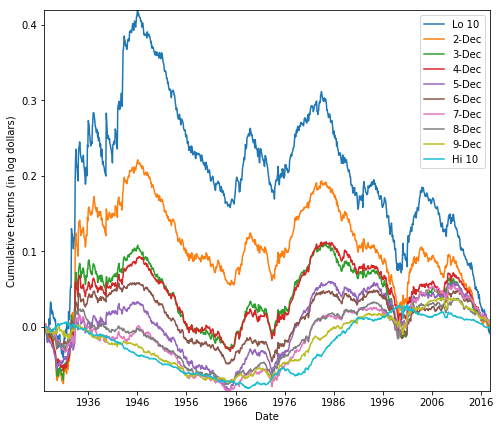

In [324]:
plt.figure(figsize=(8, 7))
plt.plot(np.log(1+me_mon_ew_sample.iloc[:,0:10]/100).cumsum())
plt.autoscale(tight=True)
plt.legend(['Lo 10', '2-Dec', '3-Dec', '4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec', '9-Dec', 'Hi 10'])
#plt.xticks(me_mon_ew_sample.index, np.arange(192701, 201712, 1000))
#plt.locator_params(nticks=500, axis='x')
plt.xlabel('Date')
plt.ylabel('Cumulative returns (in log dollars)')
plt.show()

In [318]:
np.arange(192701, 201712, 1000)

array([192701, 193701, 194701, 195701, 196701, 197701, 198701, 199701,
       200701, 201701])

# Question 6: EW Methology

The VW index is overly represented by a number of very large companies. The index will have a few stocks with market caps that are considerably higher than the average, and most of the stocks will be below the average weight of the index. By contrast, the EW index underweights a few large stocks but overweight a large number of smaller stocks. By definition, the VW index will have a lower stocks concentration. 

Advantages of EW index:
* The index is highly diversified with all stocks in the universe equally weighted.
* As opposed to market cap weighting, the index does not overweight overpriced stocks and underweight underpriced stocks. Pricing errors are random.
* Easy to construct relatively tax efficient ETFs and mutual funds.
* Usually adds 1-2 percent in annual return over long periods after expenses vs. market cap weighted indexes.

Disadvantages of EW index:
* No distinction is made between the relative or absolute valuation of stocks within the universe.
* Difficult to keep the stocks in the index equally weighted due to constant price fluctuations.
* Difficult for this type of index to manage substantial amounts of money due to the need to invest equal amounts in both the largest and smallest stocks.


Advantages of VW index:
* The total return of the index roughly mirrors the change in the total market value of all stocks.
* Rebalancing this type of index is simple.
* Since the index automatically adjusts to changes in stock prices, it is easy to create a tax efficient mutual fund or ETF to track this type of index.

Disadvantages of VW index:
* If stock prices reflect emotions over the short term, then the index will systematically own too much of overpriced stocks and too little of bargain priced stocks.
* The index is heavily influenced by the few companies with the largest market capitalizations. For instance, the top 20 stocks in the S&P 500 index can account for one-third of the total index.